### **Exponentially Weighted Average with Bias Correction**

#### **Used in Mini-Batch Gradient Descent with Momentum**
#### **A simple moving Average gives equal importance to all the data points. Even points that are encountered "recently" are not weighted any differently than data points near the starting of the data set**
##### whereas
#### **(Exponentially) Weighted Moving Averages assign more weightage recent data than the data encountered previously**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = np.random.rand (100) * 100

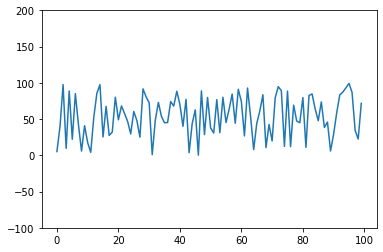

In [4]:
plt.ylim([-100, 200])
plt.plot (np.arange (0, 100, 1), dataset)

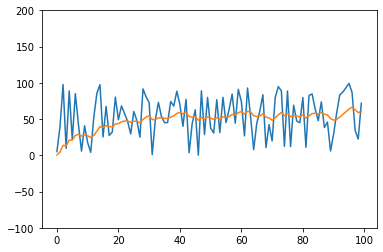

In [5]:
beta = 0.9
v = [(1 - beta) * dataset [0]]

for i in range (1, 100) :
    v.append (v [i - 1] * beta + (1 - beta) * dataset [i])

plt.ylim([-100, 200])
plt.plot (np.arange (0, 100, 1), dataset)
plt.plot (np.arange (0, 100, 1), v)

### **Bias Correction**
---
#### In the above plot, the value of the "Average" is very close to zero for the starting point.
#### Hence, to fix this problem, each Value of "v" will be divided by (1 - beta ** i)

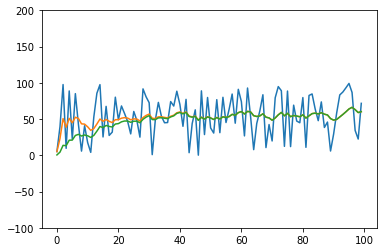

In [6]:
import math
beta = 0.9
v = [(1 - beta) * dataset [0]]
corr = 1 - beta ** 1
v_bias_corrected = [v [0] / corr]

for i in range (1, 100) :
    v.append ((v [i - 1] * beta + (1 - beta) * dataset [i]))
    
    # We are raising beta to the power of i + 1 because the 
    # ith term of the array will actually be the i + 1th term
    # of the arrayof the dataset, because arrays start from zero.
    corr = 1 - beta ** (i + 1)
    v_bias_corrected.append (v [i]/corr)
    
plt.ylim ([-100, 200])
plt.plot (np.arange (0, 100, 1), dataset)
plt.plot (np.arange (0, 100, 1), v_bias_corrected)
plt.plot (np.arange (0, 100, 1), v)

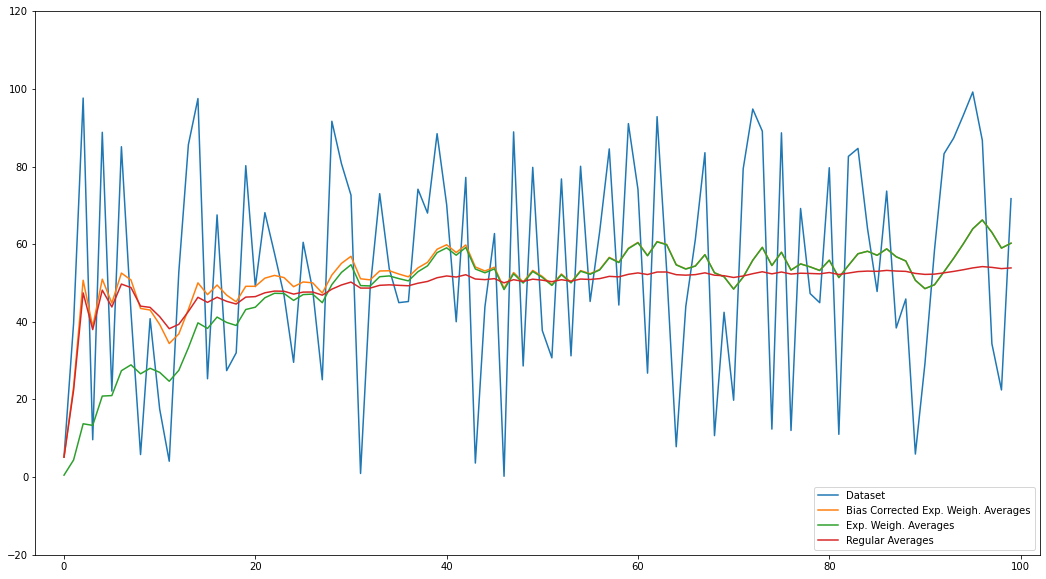

In [12]:
sum = 0
reg_avg = []
i = 1
for value in dataset :
    sum = sum + value
    reg_avg.append (sum / (i))
    i = i + 1

plt.figure (figsize = (18, 10))
plt.ylim ([-20, 120])
plt.xlim ([-3, 102])
plt.plot (np.arange (0, 100, 1), dataset, label = 'Dataset')
plt.plot (np.arange (0, 100, 1), v_bias_corrected, label = 'Bias Corrected Exp. Weigh. Averages')
plt.plot (np.arange (0, 100, 1), v, label = 'Exp. Weigh. Averages')
plt.plot (np.arange (0, 100, 1), reg_avg, label = 'Regular Averages')
plt.legend(loc="lower right")